# CF-netCDF with cfdm, cf-python & cf-plot: lab tutorial

Presented at the 2020 *ESiWACE Summer School on Effective HPC for Climate and Weather* (*Storage* -> *Input/Output and Middleware* session)

----

## A ~30 minute demonstration of the application to CF-netCDF of three inter-related Python libraries underpinned by [the CF data model](https://gmd.copernicus.org/articles/10/4619/2017/): [cfdm](https://ncas-cms.github.io/cfdm/), [cf-python](https://ncas-cms.github.io/cf-python/) & [cf-plot](http://ajheaps.github.io/cf-plot/).


#### Note that this tutorial:

* #### is *complementary* to the material covered in the 'one-hour summary' Notebook. There is some necessary overlap (reading in files, basic plotting, etc.) but for the most part this tutorial covers new ground, demonstrating further functionalities of the toolset;
* #### is *self-contained*, so can productively be completed without having seen the 'one-hour summary', but *ideally* this tutorial should be attempted *after* covering the 'one-hour summary', which is more detailed; &
* #### covers *only* use of the data tools with *netCDF (`.nc`) datasets*, when these tools are also capable of processing other data formats.

## Learning objectives:

### Four segments (~5-10 minutes each) demonstrating many (but by no means all!) capabilities of the tools:

1. **Recap on working with field constructs**: reading in from netCDF, with emphasis on data and metadata inspection.
2. **Querying & conditional masking of data**: creating masked data using encapsulated conditions.
3. **Further statistical collapses**: multiple, grouped & climatological time collapses.
4. **Manual construct creation & further regridding**: regridding with constructed coordinates.

----

## 0. Setup

First let's setup the Notebook environment:

In [1]:
# Setup for nice outputs in this Jupyter Notebook (not required in interactive Python or a script)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Let's start by importing the CF data tools modules. Note that:

* we are not using `cfdm` directly, but we are using it via of our of `cf-python` which imports & extends it;
* we use the standard alias used for `cfplot` (e.g. within its documentation):

In [2]:
import cf
import cfplot as cfp

Great. We are now all ready to use these modules on the sample netCDF datasets. Let's just remind ourselves what they are, with a shell command:

In [3]:
# Note that in IPython ! preceeeds a shell command
!ls ncas_data/*.nc

ncas_data/alpine_precip_DJF_means.nc
ncas_data/data1.nc
ncas_data/data2.nc
ncas_data/data3.nc
ncas_data/data5.nc
ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
ncas_data/land.nc
ncas_data/model_precip_DJF_means_low_res.nc
ncas_data/model_precip_DJF_means.nc
ncas_data/precip_1D_monthly.nc
ncas_data/precip_1D_yearly.nc
ncas_data/precip_2010.nc
ncas_data/precip_DJF_means.nc
ncas_data/qbo.nc
ncas_data/regions.nc
ncas_data/ta.nc
ncas_data/tripolar.nc
ncas_data/ua.nc
ncas_data/u_n216.nc
ncas_data/u_n96.nc
ncas_data/vaAMIPlcd_DJF.nc
ncas_data/va.nc
ncas_data/wapAMIPlcd_DJF.nc


----

## 1. Recap on working with field constructs

### Reading in from netCDF, with emphasis on data and metadata inspection

With cf-python, a call to `cf.read` is all that is required to create a field constructs from one or more local netCDF datasets:

In [4]:
# Read in a single file:
short_field_list = cf.read('ncas_data/land.nc')

# Display the output as concisely as possible:
short_field_list

[<CF Field: land(latitude(145), longitude(192))>]

In [5]:
# Or use cf-python to read in and create field constructs for all of these files at once!
long_field_list = cf.read('./ncas_data/*.nc')

# Again, show the output concisely:
long_field_list

[<CF Field: long_name=PRECIPITATION(projection_y_coordinate(138), projection_x_coordinate(243)) mm.d-1>,
 <CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: region(latitude(145), longitude(53))>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(long_name=t(1), long_name=p(1), long_name=latitude(256), long_name=longitude(512)) K>,
 <CF Field: air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K>,
 <CF Field: eastward_wind(time(2), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: eastward_wind(time(398), pressure(37), latitude(2), longitude(48)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: long_name=V velocity(long_name=t(1), long_name=p(27), latitude(61), longitude(96)) m s**-1>,
 <CF Field: long_name=Vertical velocity(long_name=t(1),

In [6]:
type(long_field_list)

cf.fieldlist.FieldList

cf-python is designed to be Pythonic, generally, and for example you can access `FieldList` items just as you would a standard Python list e.g. by indexing and slicing:

In [7]:
long_field_list[-1]  # last field element (-1 index for Python lists counts backwards from the last element)

<CF Field: northward_wind(time(1), atmosphere_hybrid_height_coordinate(1), latitude(144), longitude(192)) m s-1>

In [8]:
long_field_list[-5:-1]  # slicing: get the four elements before the final field element

[<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>,
 <CF Field: eastward_wind(long_name=t(1), long_name=Pressure(39), latitude(325), longitude(1)) m s-1>,
 <CF Field: eastward_wind(long_name=t(1), air_pressure(19), latitude(145), longitude(1)) m s-1>,
 <CF Field: eastward_wind(time(1), atmosphere_hybrid_height_coordinate(1), latitude(145), longitude(192)) m s-1>]

In fact, `FieldList` supports the operations possible on Python's in-built `list` type (it is in fact a subclass of the Python `list`). Try exploring other possibilities with `FieldList`s. You can see what is possible also via inspection:

In [9]:
# Note: calling __dir__() on an object in Python returns the list of the attributes and methods of an object.
# The below is equivalent to dir(cf.fieldlist.FieldList()), but also filtering out Python "special" methods:
[a for a in dir(cf.fieldlist.FieldList()) if not a.startswith('__')]

['_deprecated_method',
 '_parameters',
 'append',
 'clear',
 'close',
 'concatenate',
 'copy',
 'count',
 'equals',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'select',
 'select1',
 'select_by_construct',
 'select_by_identity',
 'select_by_naxes',
 'select_by_ncvar',
 'select_by_property',
 'select_by_rank',
 'select_by_units',
 'select_field',
 'set_equals',
 'sort']

**Best practice: keep inspecting your data and metadata as you work with it!**

*Cooking analogy*: it is wise to regularly check on the state of your food when cooking a meal, rather than only at the end!

`cf-python` and `cf-plot` provide numerous means to inspect the data and the metadata of field constructs, so nothing needs to be a "black box"...

#### Metadata focus: from most concise to most verbose output

If we now focus on a single field as an example:

In [10]:
# Read in from a single dataset as previously
field_list = cf.read('ncas_data/land.nc')

# In this case, there is only one field so unpack it from the FieldList containing it:
land_field = field_list[0]
land_field

<CF Field: land(latitude(145), longitude(192))>

Now compare the levels of detail on inspection:

In [11]:
land_field  # most concise

<CF Field: land(latitude(145), longitude(192))>

In [12]:
print(land_field)  # medium detail

Field: land (ncvar%land)
------------------------
Data            : land(latitude(145), longitude(192))
Dimension coords: latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east


In [13]:
land_field.dump()  # full detail, most verbose

------------------------
Field: land (ncvar%land)
------------------------
Conventions = 'CF-1.6'
standard_name = 'land'

Data(latitude(145), longitude(192)) = [[0.0, ..., 0.0]]

Domain Axis: latitude(145)
Domain Axis: longitude(192)

Dimension coordinate: latitude
    axis = 'y'
    standard_name = 'latitude'
    units = 'degrees_north'
    Data(latitude(145)) = [-90.0, ..., 90.0] degrees_north

Dimension coordinate: longitude
    axis = 'x'
    standard_name = 'longitude'
    units = 'degrees_east'
    Data(longitude(192)) = [0.0, ..., 358.125] degrees_east



As a quick verification of the output we are getting, compare this with the output from other tools, e.g. with `ncdump` (`-h` for header information only):

In [14]:
# Note that in IPython ! preceeeds a shell command
!ncdump -h ncas_data/land.nc

netcdf land {
dimensions:
	lat = 145 ;
	lon = 192 ;
variables:
	double lat(lat) ;
		lat:units = "degrees_north" ;
		lat:standard_name = "latitude" ;
		lat:axis = "y" ;
	double lon(lon) ;
		lon:units = "degrees_east" ;
		lon:standard_name = "longitude" ;
		lon:axis = "x" ;
	double land(lat, lon) ;
		land:standard_name = "land" ;

// global attributes:
		:Conventions = "CF-1.6" ;
}


#### Data focus: figures or plots

The field construct’s data is stored in a `cf.Data` class instance that is accessed via the `data` attribute:

In [15]:
land_field.data  # most concise

<CF Data(145, 192): [[0.0, ..., 0.0]]>

The `array` attribute additionally provides direct access to the NumPy data array:

In [16]:
land_field.array  # more detail and now as standard numpy.ndarray

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Note this is a standard NumPy array! So for further inspection options (e.g. to see the entire array without truncation) consult NumPy methods and attributes.

In [17]:
type(land_field.array)

numpy.ndarray

As a quick verification of the output we are getting, compare this with the output from other tools, e.g. with `ncdump` (`-v land` to show the data for the `land` variable):

In [18]:
# Note that in IPython ! preceeeds a shell command
!ncdump -v land ncas_data/land.nc

netcdf land {
dimensions:
	lat = 145 ;
	lon = 192 ;
variables:
	double lat(lat) ;
		lat:units = "degrees_north" ;
		lat:standard_name = "latitude" ;
		lat:axis = "y" ;
	double lon(lon) ;
		lon:units = "degrees_east" ;
		lon:standard_name = "longitude" ;
		lon:axis = "x" ;
	double land(lat, lon) ;
		land:standard_name = "land" ;

// global attributes:
		:Conventions = "CF-1.6" ;
data:

 land =
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

For data arrays of any realistic size, "eyeballing" the numerical data from the array will not provide much insight into what is going on, at least without a great deal of scrutiny. Often the best way to see what data you are working with is to plot it!

This is where cf-plot becomes very useful:

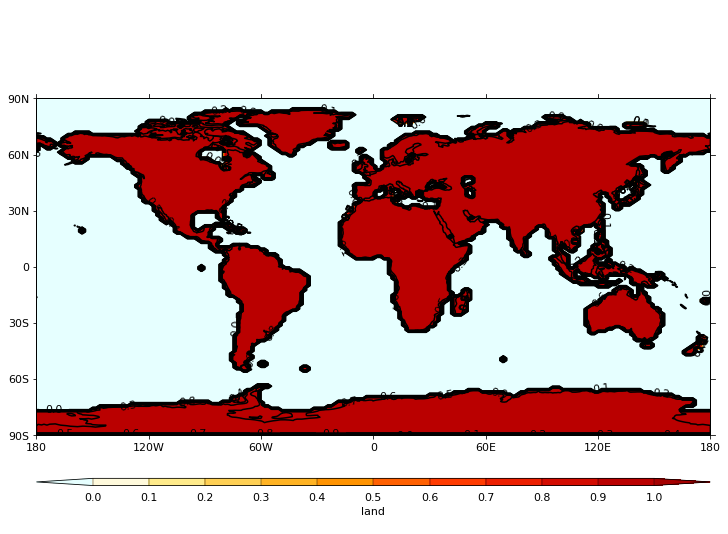

In [19]:
# This is all that is required in this case to obtain a simple contour plot!
cfp.con(land_field)  

Clearly, as hinted at by the file name `land.nc`, the data depicts whether each point is land or not, with `0` and `1` integers implying Boolean truth values.

So in one-line we could see precisely what the data was, to complement the detail we were given in the metadata.

However, this "rough and ready" plot is a big ugly, as the contour lines and labels are clustered and overlapping. If we wanted to neaten up this plot, there are plenty of options for customisation in cf-plot. For instance, specifying the two possible levels, changing the colour scale, and hiding the contour lines makes it look much better:

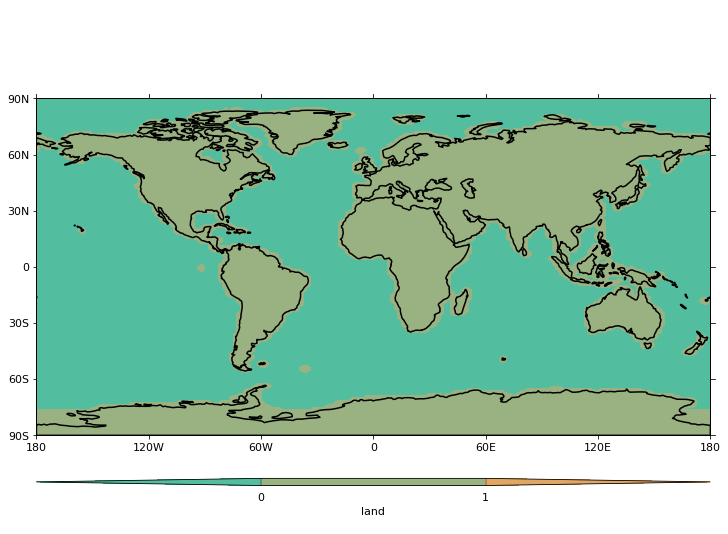

In [20]:
cfp.mapset()
cfp.levs(manual=[0, 1])
cfp.cscale('precip_diff_1lev')
cfp.con(land_field, lines=False)

***Take home message***: *once you read in your netCDF data, there are numerous ways to inspect its data and metadata using cf-python and cf-plot. As good practice, inspect your data regularly during your analysis workflow.*

Note there are also means, not demonstrated here (but see the documentation and other resources listed at the end of this Notebook), to inspect more specific properties. A quick example of grabbing the standard name and units individually is shown in the next section.

----

## 2. Querying & conditional masking of data

### Creating masked data using encapsulated conditions

For this section let's work with another sample dataset. For now, let's quickly see what data it contains, by checking the `standard_name` and `units` attributes, as an alternative to full-field inspection:

In [21]:
fields_list = cf.read('ncas_data/ta.nc')
f = fields_list[0]

# Inspect basic properties, without outputting further information
name =  f.standard_name
units = f.units
print("Name:", name)
print("Units:", units)

Name: air_temperature
Units: K


Let's rename the variable holding the field to something more descriptive now we know its general nature. We will use this field in a moment, after an introduction to cf-python queries:

In [22]:
temp_field = f
temp_field

<CF Field: air_temperature(time(1), atmosphere_hybrid_height_coordinate(1), latitude(145), longitude(192)) K>

**A brief aside to introduce queries in cf-python**

The `cf.Query` object encapsulates some condition. For example (with valid alternative syntax shown as comments):

In [23]:
# Equal to 100
equals_100 = cf.eq(100)  # equivalently, cf.Query('eq', 100)

# (Strictly) less than 100
less_than_100 = cf.lt(100)  # equivalently, cf.Query('lt', 100)

# Greater than or equal to 0
greater_or_equal_to_100 = cf.ge(100)  # equivalently, cf.Query('ge', 100)

Such queries can be applied to a (sensible) Python object, including a *compound* cf-python object, via the `evaluate` method on the query:

In [24]:
equals_100.evaluate(100)

True

In [25]:
less_than_100.evaluate(100)

False

In [26]:
less_than_100.evaluate(cf.Data([50, 100, 150]))

<CF Data(3): [True, False, False]>

In [27]:
greater_or_equal_to_100.evaluate(cf.Data([50, 100, 150]))

<CF Data(3): [False, True, True]>

Now we go back to our field, `temp_field`, as read-in from netCDF before.

As one application, using queries we can selectively mask our data according to a query condition of our choosing. Let's see this in practice with `temp_field`.

Start by defining the query. We can start by inspecting the data to think of some query conditions that will be interesting to apply:

Field: air_temperature (ncvar%ta)
---------------------------------
Data            : air_temperature(time(1), atmosphere_hybrid_height_coordinate(1), latitude(145), longitude(192)) K
Dimension coords: time(1) = [1978-09-01 06:00:00] 360_day
                : atmosphere_hybrid_height_coordinate(1) = [20.000337600708008] m
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
Coord references: standard_name:atmosphere_hybrid_height_coordinate
Domain ancils   : atmosphere_hybrid_height_coordinate(atmosphere_hybrid_height_coordinate(1)) = [20.000337600708008] m
                : long_name=vertical coordinate formula term: b(k)(atmosphere_hybrid_height_coordinate(1)) = [0.99771648645401]
                : surface_altitude(latitude(145), longitude(192)) = [[2801.478759765625, ..., 0.0]] m


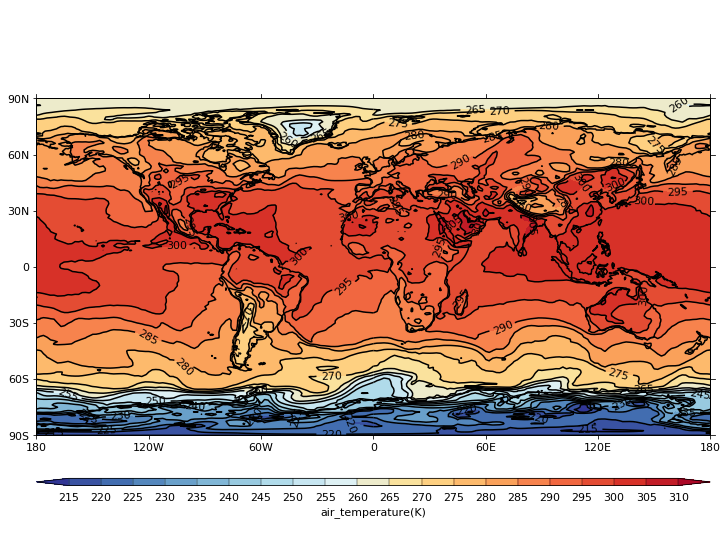

In [28]:
print(temp_field)

# Reset plot styling and customise plots differently for this section to highlight various options
cfp.levs()
cfp.setvars()
cfp.mapset()
cfp.cscale('cmp_b2r')

cfp.con(temp_field)

Before we create and apply some queries, let's convert the units to degrees Celsius which is probably more intuitive to work with for most:

[[[[218.806640625, ..., 262.7880859375]]]] K
[[[[-54.343360900878906, ..., -10.361913681030273]]]] deg_C


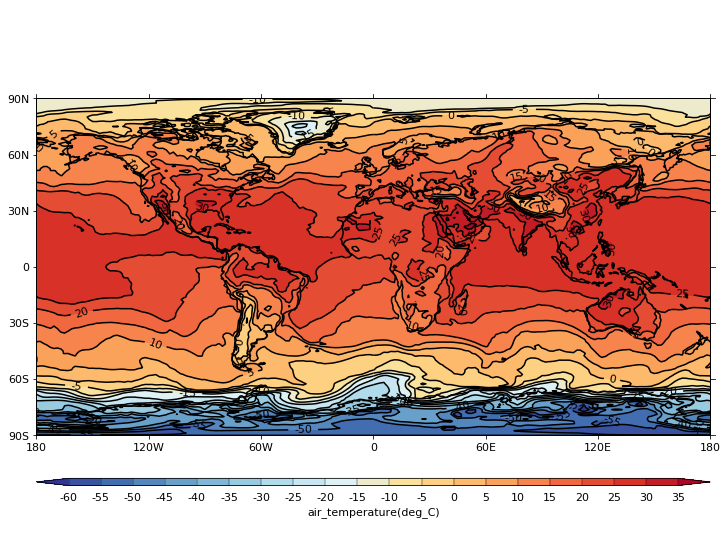

In [29]:
# Quickly print the data pre-conversion, to compare afterwards
print(temp_field.data)

# Now convert units
temp_field.Units = cf.Units('deg_C')
print(temp_field.data)
cfp.con(temp_field)  # units detected automatically via the metadata, no need to specify mnaually!

Looking at the field in the plot above, it seems it could be interesting to mask all data that isn't extreme in value, and conversely mask an extreme (go with the lowest temperatures). So create some queries for these, based on some illustrative values read off the colourbar scale:

In [30]:
non_extreme_values = cf.wi(-7, 23)  # roughly the 30oC temp range holding most of the data points
lowest_temperatures = cf.lt(0)  # anything colder than the freezing point of water

Using the `where` method on a field construct, we can set data values that meet the query condition to a certain value. We could set it to a numeric value, but let's use masked data, via the `cf.masked` constant:

In [31]:
field_with_masked_non_extremes = temp_field.where(non_extreme_values, cf.masked)
field_with_masked_lowest_temperatures = temp_field.where(lowest_temperatures, cf.masked)

We now have masked fields, where data has been masked according to the conditions encapsulated by our queries. Let's plot these fields to see the mask coverage:

Masking all but the extremes:


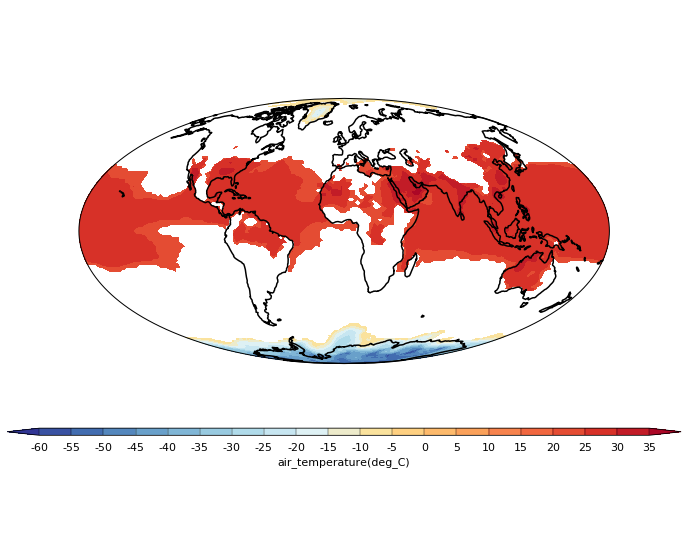

Masking the lowest temperatures:


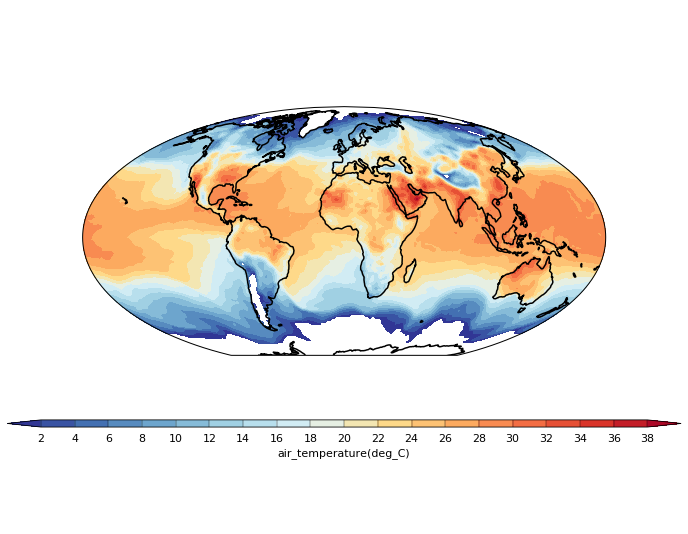

In [32]:
# Plot the first timeslice of the original and masked fields
# Plot before and after side-to-side to make it easy to compare the two
cfp.mapset()
cfp.mapset(proj='moll')

print("Masking all but the extremes:")
cfp.con(field_with_masked_non_extremes, lines=False)

print("Masking the lowest temperatures:")
cfp.con(field_with_masked_lowest_temperatures, lines=False)

Naturally, the poles have the coldest air temperatures as we can see from these plots. cf-plot supports many projections for plotting data on, so let's change to the Polar Stereographic Projection on the North Pole (`npstere`) to see the data and mask around the North Pole.

We also plot the two masked field constructs side-by-side for easy comparison. Note the use of`cfp.gopen` with multiple columns specified, and the use of `cfp.gpos` to set positions for the sub-plots:

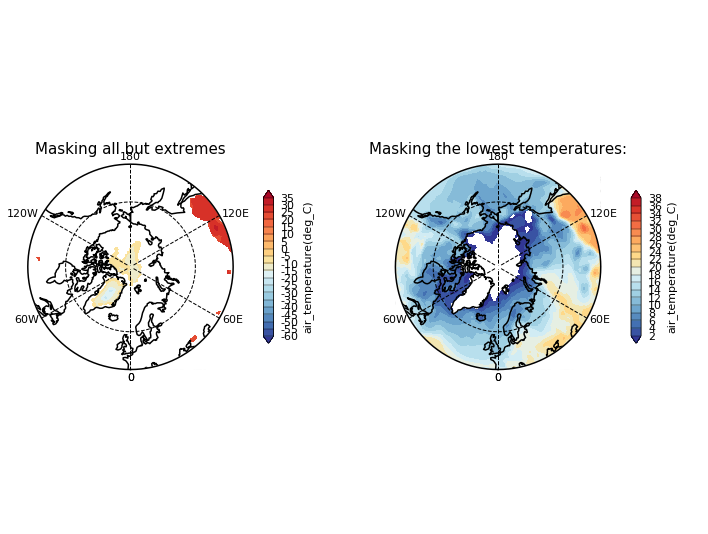

In [33]:
cfp.mapset(proj='npstere', boundinglat=44)

# Plot before and after side-to-side to make it easy to compare the two
cfp.gopen(rows=1, columns=2)
#cfp.levs()
cfp.gpos(1)
cfp.con(
    field_with_masked_non_extremes, lines=False, colorbar_shrink=0.5,
    title="Masking all but extremes"
)
cfp.gpos(2)
cfp.con(
    field_with_masked_lowest_temperatures, lines=False, colorbar_shrink=0.5,
    title="Masking the lowest temperatures:"
)
cfp.gclose()

*In this section, we've seen cf-python queries in action, particularly to apply conditional masking to a dataset that was not previously masked. We've also applied some basic customisations to the plots we generated using cf-plot.*

----

## 3. Further statistical collapses

### Multiple, grouped & climatological time collapses

Let's continue to look at air temperature data, but this time from a different sample dataset:

In [34]:
temp_field_list = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')
new_temp_field = temp_field_list[0]
print(new_temp_field)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


Note how, this time, we have a field with a time dimension of size greater than one, whereas in the previous section our field had a size-one time dimension i.e. was based upon a fixed time. So, in order to get meaningful subsets and statistics, we need to reduce the field down.

#### a) Recap: simple collapses

We can do that by taking subspaces, or by making statistical collapses. For example, the following reductions result in different data statistics:

In [35]:
def print_stats(field):
    """ Quick utility function to print out the mean, max and min temperatures on the field's data. """
    print("Mean is:", field.mean())
    print("Maximum is:", field.max())
    print("Minimum is:", field.min())
    print() # newline at end for clarity

# Just subspace to take first time point
first_subs_field = new_temp_field[0, :, :]
print("First time point data:\n")
print_stats(first_subs_field)

# Collapse over max temps
t_max_collapse_field = new_temp_field.collapse('T: maximum')
print("T maximum collapse data:\n")
print_stats(t_max_collapse_field)

# Collapse over min temps
t_min_collapse_field = new_temp_field.collapse('T: minimum')
print("T minimum collapse data:\n")
print_stats(t_min_collapse_field)


First time point data:

Mean is: 275.14305111705926 K
Maximum is: 306.0457458496094 K
Minimum is: 227.51492897871387 K

T maximum collapse data:

Mean is: 286.20024274154423 K
Maximum is: 311.89597497768546 K
Minimum is: 237.82638549804688 K

T minimum collapse data:

Mean is: 266.8002803268184 K
Maximum is: 299.16865329527053 K
Minimum is: 203.62451171875 K



#### b) Multiple collapses

Multiple collapses on a given field are also possible. You can either make multiple calls to collapse (one on the original field construct and then one on each interim field construct) or use an equivalent syntax with spaces to separate the individual collapses, like so:

In [36]:
a = new_temp_field.collapse('area: mean').collapse('T: sum_of_squares')
b = new_temp_field.collapse('area: mean T: sum_of_squares')  # equivalent syntax for multiple collapses
print(a.equals(b))
print(a.data)

True
[[[9180318.459869718]]] K2


Note it is non-commutative, i.e. order matters (generally) for these operations!

In [37]:
# Equivalent syntax for multiple collapses.
c = new_temp_field.collapse('T: sum_of_squares').collapse('area: mean')
d = new_temp_field.collapse('T: sum_of_squares area: mean')  # Equivalent syntax for multiple collapses
print(c.equals(d))
print(c.data)

True
[[[9231893.645907423]]] K2


Note also how the units changed from Kelvin to Kelvin squared (due to taking the sum of squares). This is all managed under-the-hood by cf-python.

#### c) Grouped collapses

A grouped collapse is one for which an axis is not collapsed completely to size 1. Instead the collapse axis is partitioned into non-overlapping groups and instead *each group is collapsed to size 1*.

As an example, we can use this to calculate the zonal mean for a givne hemisphere, for instance:

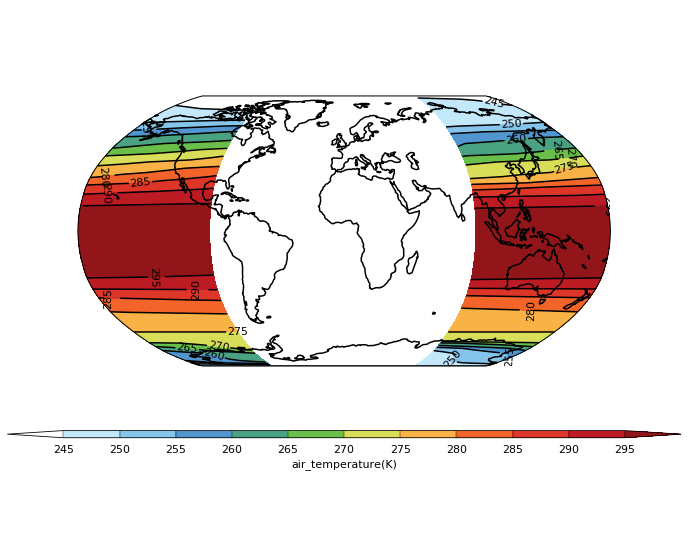

In [38]:
cfp.mapset()
cfp.mapset(proj='robin')
cfp.cscale('WhiteBlueGreenYellowRed')

zonal_mean_1 = new_temp_field.collapse('X: mean', group=cf.Data(180, 'degrees'))
cfp.con(zonal_mean_1[1,:,:])

#### d) Collapses on Climatological Time

Climatological statistics can be derived from corresponding portions of the annual cycle in a set of years. They require at least two collapses, where each collapse method needs a qualifier of `within` or `over` either `years` or `days`.

Here is an example were we determine the *multiannual average of the seasonal means*, then compare the results for two different seasons:


March April May:

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes) time(1): mean within years time(1): mean over years
Dimension coords: time(1) = [1960-04-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m

Sept Oct Nov:

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes) time(1): mean within years time(1): mean over years
Dimension coords: time(1) = [1960-10-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0]

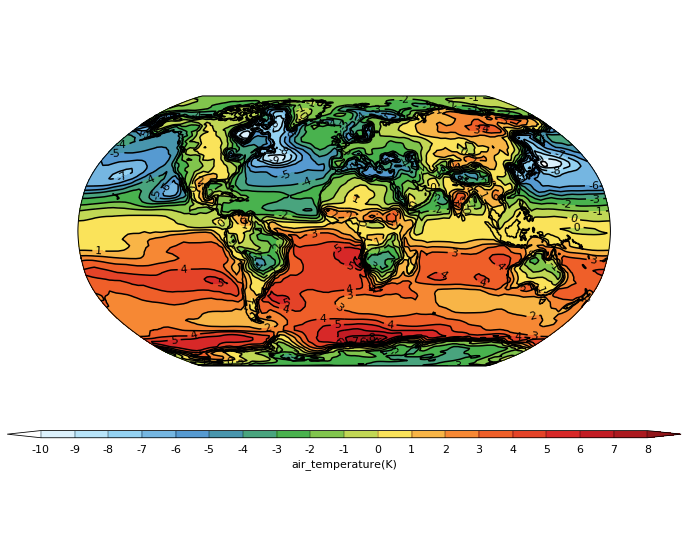

In [39]:
the_four_seasons = cf.seasons()
march_april_may_query = cf.mam()  # alternatively use T=cf.month(cf.wi(2, 4))))
sept_oct_nov_query = cf.son()     # etc.

multiannual_average_of_seasonal_means = new_temp_field.collapse(
    'T: mean within years T: mean over years',
    within_years=the_four_seasons, weights=True
)

print("\nMarch April May:\n")
mam_field = multiannual_average_of_seasonal_means.subspace(T=march_april_may_query)
print(mam_field)

print("\nSept Oct Nov:\n")
son_field = multiannual_average_of_seasonal_means.subspace(T=sept_oct_nov_query)
print(son_field)

print("\nDifference between MAM and SON Multiannual Average of Seasonal Means:\n")
cfp.con(mam_field - son_field)

*We've seen that collapses can be made singularly, multiply, by groups, and on climatological time. However, there is still plenty on statistical collapses we did not cover here, such as weighted collapses.*

----

## 4. Manual construct creation & further regridding

### Regridding with constructed coordinates

Let's use a different sample dataset again, for diversity. This time, read-in a precipitation dataset and take a field construct from it to work with:

In [40]:
precip_fields = cf.read('ncas_data/precip_2010.nc')
precip_field = precip_fields[0]
print(precip_field)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(12), latitude(145), longitude(53)) mm
Dimension coords: long_name=time(12) = [2010-01-16 00:00:00, ..., 2010-12-16 00:00:00] gregorian
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(53) = [-33.75, ..., 63.75] degrees_east


Instead of regridding onto a destination domain already contained in another field construct, we can create the domain we want from scratch using cf-python.

First create custom dimension coordinates (`cf.DimensionCoordinate`). We use `numpy.linspace`, which creates evenly spaced numbers over a specified interval, to create a 'grid' that is roughly half the resolution of the source grid of our precipitation field (145/2 ~ 72 for latitude points, etc.):

In [41]:
import numpy as np
# Use around half the number of grid points for lat and lon
lat = cf.DimensionCoordinate(data=cf.Data(np.linspace(-90, 90, num=72), 'degrees_north'))
lon = cf.DimensionCoordinate(data=cf.Data(np.linspace(-33.75, 63.75, num=27), 'degrees_east'))

Next, we create Voronoi bounds for the new dimension coordinates. Note this is necessary so that we can use the *conservative* method for regridding; it conserves the field integral with respect to area, so needs cell bounds defined to work.

In [42]:
lon_bounds = lon.create_bounds()
lat_bounds = lat.create_bounds(min=-90, max=90)
lon.set_bounds(lon_bounds)
lat.set_bounds(lat_bounds)

Now, the regridding itself: use spherical regridding to regrid the field construct onto the 'grid' (domain) of the new coordinates, conservatively, and check the result:

In [43]:
regridded_precip_field = precip_field.regrids({'longitude': lon, 'latitude': lat}, method='conservative')
print(regridded_precip_field)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(12), latitude(72), longitude(27)) mm
Dimension coords: long_name=time(12) = [2010-01-16 00:00:00, ..., 2010-12-16 00:00:00] gregorian
                : latitude(72) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east


Let's check the difference in the original and regridded field.

We don't have to manually check through two fields to work out any differences: there is a method `equals` on fields and other constructs that compares them. We set a high verbosity level to output details on the differences, as well as just a `True`/`False` result for whether they are equal:

In [44]:
regridded_precip_field.equals(precip_field, verbose='detail')

# Just confirm this, let's inspect to see:
print(regridded_precip_field)
print(precip_field)

Data: Different shapes: (12, 72, 27) != (12, 145, 53)
Field: Different data
Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(12), latitude(72), longitude(27)) mm
Dimension coords: long_name=time(12) = [2010-01-16 00:00:00, ..., 2010-12-16 00:00:00] gregorian
                : latitude(72) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east
Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(12), latitude(145), longitude(53)) mm
Dimension coords: long_name=time(12) = [2010-01-16 00:00:00, ..., 2010-12-16 00:00:00] gregorian
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(53) = [-33.75, ..., 63.75] degrees_east


Finally, let's plot the field construct before and after regridding, so we can see the difference in the data and domain visually:

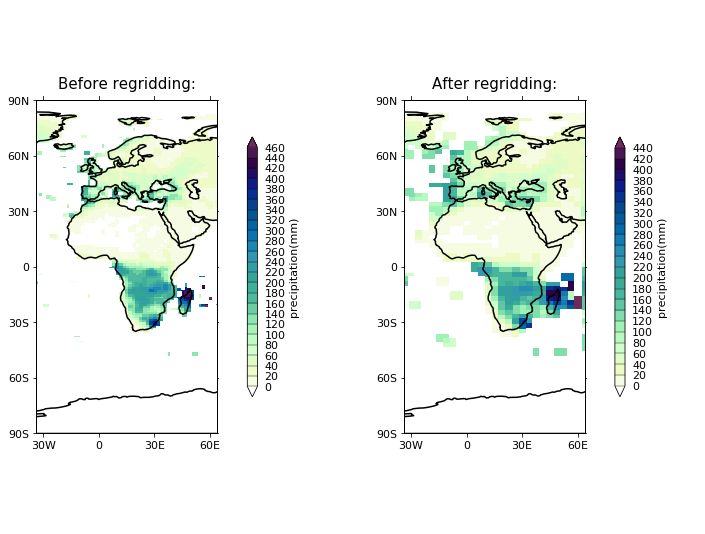

In [45]:
# Subspace what we want to plot:
precip_field_0 = precip_field[0]
regridded_precip_field_0 = regridded_precip_field[0]

# First customise the plot to make the changes due to regridding clear
cfp.setvars()
cfp.mapset()
cfp.mapset(proj='cyl')
cfp.cscale('precip_11lev')

# Plot before and after side-to-side to make it easy to compare the two
cfp.gopen(rows=1, columns=2)
cfp.levs()
cfp.gpos(1)
cfp.con(
    precip_field_0, blockfill=True, lines=False, colorbar_orientation='vertical',
    colorbar_shrink=0.5, title="Before regridding:"
)
cfp.gpos(2)
cfp.con(
    regridded_precip_field_0, blockfill=True, lines=False, colorbar_orientation='vertical',
    colorbar_shrink=0.5, title="After regridding:"
)
cfp.gclose()

As we expect, the regridded field resembles the original in its nature, but is at lower-resolution due to its new grid.

*Overall, we've seen that we are able to regrid onto a custom domain (as well as domains contained in other fields as in other regridding examples) and that we can construct custom domains to our specification using the constructs in cf-python.*

----

## Further study, resources & support

### Should you like to explore further, first of all you are encouraged to adapt & experiment with the code in this Notebook.

For example:

* run similar operations to those demonstrated, but instead on different example netCDF datasets from `ncas_data`, as listed in the 'Setup' section;
* consult the documentation for each library (linked below) to discover new keyword arguments and apply them to amend the behaviour or output of the calls made here, or indeed find and try out different methods available;
* copy code cells from this Notebook into a Python script or interactive Python, where you will see the same behaviour but from outside of a Notebook environment, which may be preferable to you.

### Additionally, there are various sources of further material to work through:

* our **full (day-long) training course material, including exercises with model answers**: under the `full_course` directory of https://github.com/NCAS-CMS/cf-training; please first read through the guidance in the README (at the foot of the repository, as linked) explaining setup requirements and the best order to work through the material;
* a **one-hour summary Jupyter Notebook** (exactly as used for the walk-through in the academic talk session of the 2020 ESiWACE Summer School on Effective HPC for Climate and Weather): https://github.com/NCAS-CMS/cf-training/blob/master/short_course/one_hour_summary.ipynb;
* **extensive tutorial for cfdm** in the documentation: https://ncas-cms.github.io/cfdm/tutorial.html;
* **extensive tutorial for cf-python** in the documentation: https://ncas-cms.github.io/cf-python/tutorial.html.


### For further information and resources, please consult the documentation*:

\*also hyperlinked on the library names at the top of the Notebook

* cfdm (`cfdm`): https://ncas-cms.github.io/cfdm/;
* cf-python (`cf`): https://ncas-cms.github.io/cf-python/;
* cf-plot: http://ajheaps.github.io/cf-plot/.


### Otherwise, for questions, advice on problems or feature requests etc., please email sadie.bartholomew@ncas.ac.uk. Thanks!

----